# Handwritten Character Recognition 

Uses a multilayer perceptron implemented in 'NeuralNetwork.py' to label handwritten digits from the MNIST dataset.
Model specification and parameters taken from http://neuralnetworksanddeeplearning.com/chap1.html

## Imports and Setup

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NNLayer, EuclideanLoss, SigmoidLayer, MultilayerPerceptron, ReLULayer
from one_hot import one_hot


## Data import 

In [2]:
(train_data, train_labels,), (test_data, test_labels) =  mnist.load_data()
test_data_original = test_data 

Train data shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

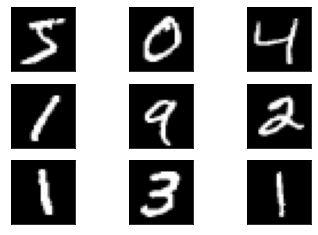

In [3]:
print('Train data shape: ', train_data.shape)
print('Train labels shape: ', train_labels.shape)
print('Test data shape: ', test_data.shape)
print('Test labels shape: ', test_labels.shape)

for i in range(9):
    ax = plt.subplot(330 + 1 + i, )
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(train_data[i], cmap = plt.get_cmap('gray'))
plt.show

## Training

In [4]:
#reshape image data from [28,28] to [784]:

train_data = train_data.reshape((train_data.shape[0], 784))
test_data = test_data.reshape((test_data.shape[0], 784))
print(train_data.shape)
print(test_data.shape)

#reshape labels to one_hot encoding:
train_labels_onehot = one_hot(train_labels, n_classes = 10)
test_labels_onehot = one_hot(test_labels, n_classes = 10)

print(train_labels.shape)
print(test_labels.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [5]:
from sklearn.preprocessing import StandardScaler

loss_function = EuclideanLoss()
mlp = MultilayerPerceptron(n_input=784, n_hidden = [100] , n_output=10, activation_function_hidden = ReLULayer, activation_function_output=SigmoidLayer)

n_epochs = 50
batch_size = 100
learning_rate = 0.01
num_batches = train_labels.shape[0] // batch_size 

epoch_loss = np.zeros(n_epochs)
epoch_acc = np.zeros(n_epochs)
epoch_acc_train = np.zeros(n_epochs)

# Normierung der Trainings- und Testdaten auf den Mittelwert 0 und Varianz 1
scaler = StandardScaler()
scaler.mean_ = 0
scaler.var_ = 1.0
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

for epoch_idx in range(n_epochs):
    l = len(train_data)
    shuffled_indices = np.random.permutation(l)
    batched_data = train_data[shuffled_indices]
    batched_labels = train_labels_onehot[shuffled_indices]
    batched_data = np.split(batched_data, num_batches)
    batched_labels = np.split(batched_labels, num_batches)

    for iter_idx, (batch_data, batch_labels) in enumerate(zip(batched_data, batched_labels)):
    
        forward_labels = mlp.forward(batch_data)
        error = loss_function.forward(forward_labels, batch_labels)
        error_gradient = loss_function.gradient()
        mlp.backward(error_gradient)
        mlp.update_weights(learning_rate)
    
    data = np.zeros((test_data.shape[0],28*28))

    forward_labels = mlp.forward(test_data)
    error = loss_function.forward(forward_labels, test_labels_onehot)
    epoch_loss[epoch_idx] = error 

    pred_labels = mlp.classify(test_data)
    acc = np.sum(pred_labels == test_labels) / float(test_labels.shape[0])
    epoch_acc[epoch_idx] = acc 

best_epoch = np.argmax(epoch_acc)
max_acc = epoch_acc[best_epoch]
print(f"Highest Accuracy of {max_acc} in epoch {best_epoch}!")

Highest Accuracy of 0.9761 in epoch 39!


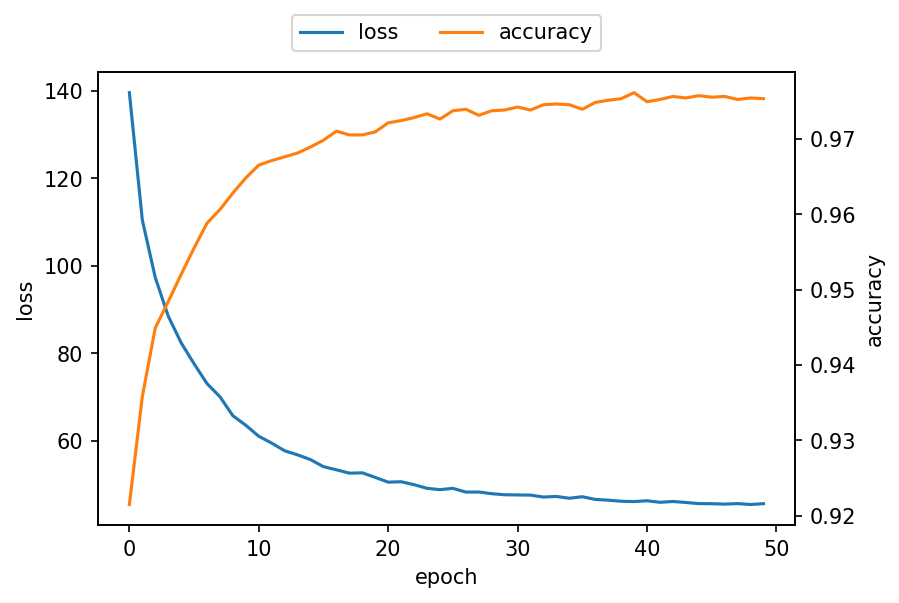

In [6]:
#plot epoch accs:
_, ax_loss = plt.subplots(dpi=150)
ax_loss.plot(np.arange(epoch_loss.shape[0]), epoch_loss, c='C0', label='loss')
ax_loss.set_xlabel('epoch')
ax_loss.set_ylabel('loss')
ax_acc = ax_loss.twinx()
ax_acc.plot(np.arange(epoch_loss.shape[0]), epoch_acc, c='C1', label='accuracy')
_ = ax_acc.set_ylabel('accuracy')
hloss, lloss = ax_loss.get_legend_handles_labels()
hacc, lacc = ax_acc.get_legend_handles_labels()
ax_loss.legend(hloss + hacc, lloss + lacc, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

## Error Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

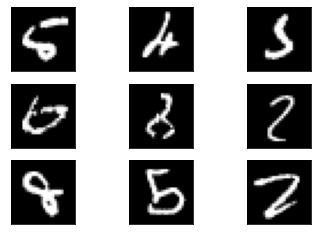

In [13]:
wrong_classified_indices = [x for x in range(test_labels.shape[0]) if test_labels[x] != pred_labels[x]]

#examples of wrongly classified digits:
for i in range(9):
    ax = plt.subplot(330 + 1 + i, )
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(test_data_original[wrong_classified_indices[i*3]], cmap = plt.get_cmap('gray'))
plt.show